# STAT 207 Homework 4 [50 points]

## Quantitative Variable Descriptive Analytics and Probability

Due: Friday, February 10 by noon (11:59 am) CST

<hr>

## Package Imports

We'll import three Python packages that we've used so far and will need for this assignment.  Those packages are pandas, matplotlib.pyplot, and seaborn.  

Run the cell provided below to access the functions in these packages.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<hr>

## <u>Case Study</u>: Groundhog Day

On Groundhog Day (February 2), a famous groundhog in Pennsylvania called Punxsutawney Phil emerges from his burrow.  Spectators watch and observe whether he sees his shadow or not.  The legend says that if he sees his shadow, winter will continue for six more weeks; if not, spring is coming early.  In 2023, Phil saw his shadow.  But, does the data support the legend?  In this Case Study, we'll examine historical data to see what the data supports.

## 1. Read in the Data [3 points]

Read in the groundhog.csv data.  Check the data for missing data, make any necessary adjustments, and print the first few rows of the data frame.

In [2]:
df = pd.read_csv('groundhog.csv')
df.shape

(122, 10)

In [3]:
df.head()

,Year,Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1895,No Record,26.60,15.6,21.9,17.0,39.97,27.6,40.2,31.3
1,1896,No Record,35.04,22.2,33.5,26.6,38.03,25.3,36.9,27.8
2,1897,No Record,33.39,23.6,34.7,27.9,38.79,32.0,44.0,36.9
3,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0
4,1899,No Record,25.50,18.1,22.2,20.0,37.63,29.3,38.4,34.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         122 non-null    int64  
 1   Phil                                         122 non-null    object 
 2   February Average Temperature                 122 non-null    float64
 3   February Average Temperature (Northeast)     122 non-null    float64
 4   February Average Temperature (Midwest)       122 non-null    float64
 5   February Average Temperature (Pennsylvania)  122 non-null    float64
 6   March Average Temperature                    122 non-null    float64
 7   March Average Temperature (Northeast)        122 non-null    float64
 8   March Average Temperature (Midwest)          122 non-null    float64
 9   March Average Temperature (Pennsylvania)     122 non-null    float64
dtypes:

In [5]:
df['Phil'].unique()

array(['No Record', 'Full Shadow', 'No Shadow', 'Partial Shadow'],
      dtype=object)

In [6]:
df_gh = pd.read_csv('groundhog.csv', na_values = ['No Record'])
df_gh.shape

(122, 10)

In [7]:
df_gh['Phil'].unique()

array([nan, 'Full Shadow', 'No Shadow', 'Partial Shadow'], dtype=object)

In [8]:
df_gh = df_gh.dropna()
df_gh.shape

(116, 10)

In [9]:
df_gh['Phil'].unique()

array(['Full Shadow', 'No Shadow', 'Partial Shadow'], dtype=object)

In [10]:
df_gh.head()

,Year,Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
3,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0
5,1900,Full Shadow,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3
6,1901,Full Shadow,29.86,16.0,26.2,18.9,40.71,30.8,41.9,35.1
8,1903,Full Shadow,28.42,24.5,31.3,28.0,42.21,40.4,47.7,44.5
9,1904,Full Shadow,31.59,15.0,28.2,19.2,41.76,29.8,42.8,34.0


## 2. Phil's Outcomes [9 points]

For this problem, we will explore the results of Phil's experiment by focusing on the variable Phil. 

**a)** First, what is the sample space of possible outcomes for Phil's experiment?

{Full Shadow}, {No Shadow}, {Partial Shadow}

**b)** Then, we'd like to summarize the observed outcomes for this experiment from the data.  Calculate the relative frequencies for each of the possible results when Phil emerges from his burrow.

In [11]:
freq_full = len(df_gh[df_gh.Phil == 'Full Shadow'])
freq_partial = len(df_gh[df_gh.Phil == 'Partial Shadow'])
freq_no = len(df_gh[df_gh.Phil == 'No Shadow'])

print("The frequency of full shadow:",freq_full)
print("The frequency of partial shadow:",freq_partial)
print("The frequency of no shadow:",freq_no)

The frequency of full shadow: 100
The frequency of partial shadow: 1
The frequency of no shadow: 15


**c)** Which result is most common?  Least common?

Based on these results, choose whether you'd like to filter your data to remove uncommon outcomes.  Explain your decision.

Full shadow is most common. Partial shadow is least common. I would like to filter out the partial shadow outcome because it has only one outcome.

In [12]:
df_gh2 = df_gh[df_gh.Phil != 'Partial Shadow']
df_gh2['Phil'].unique()

array(['Full Shadow', 'No Shadow'], dtype=object)

In [13]:
df_gh2.head()

,Year,Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
3,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0
5,1900,Full Shadow,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3
6,1901,Full Shadow,29.86,16.0,26.2,18.9,40.71,30.8,41.9,35.1
8,1903,Full Shadow,28.42,24.5,31.3,28.0,42.21,40.4,47.7,44.5
9,1904,Full Shadow,31.59,15.0,28.2,19.2,41.76,29.8,42.8,34.0


## 3. Midwest Temperatures [17 points]

Because we live in the Midwest, we'd like to observe whether Phil's prediction about winter seems to be accurate, based on the average temperatures recorded in the Midwest.  The following steps will help you gather information to answer this question.

**a)** Generate side-by-side violin plots to display the average temperature in February for the Midwest, based on the result of Punxsutawney Phil's shadow.

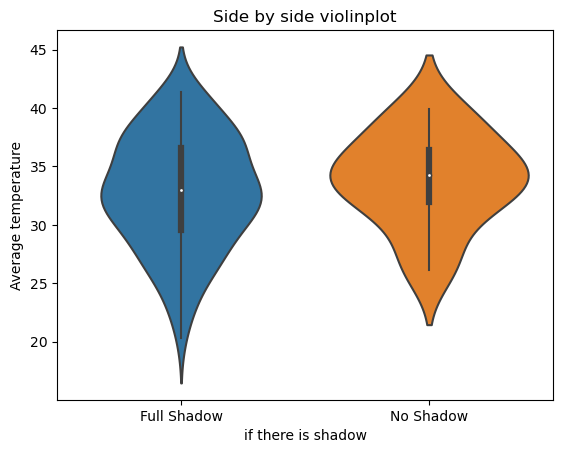

In [36]:
sns.violinplot(x = 'Phil', y = 'February Average Temperature (Midwest)', data = df_gh2)
plt.xlabel('if there is shadow')
plt.ylabel('Average temperature')
plt.title('Side by side violinplot')
plt.show()

**b)** For each of the results of Phil's experiment, calculate one measure of center and one measure of spread.

In [15]:
print('Standard Deviation of full shadow:')
df_gh2[df_gh2.Phil == 'Full Shadow']['February Average Temperature (Midwest)'].std()

Standard Deviation of full shadow:


4.807664230531845

In [16]:
print('Standard Deviation of no shadow:')
df_gh2[df_gh2.Phil == 'No Shadow']['February Average Temperature (Midwest)'].std()

Standard Deviation of no shadow:


3.9879938864164823

In [17]:
print('Mean of full shadow:')
df_gh2[df_gh2.Phil == 'Full Shadow']['February Average Temperature (Midwest)'].mean()

Mean of full shadow:


32.799

In [18]:
print('Mean of no shadow:')
df_gh2[df_gh2.Phil == 'No Shadow']['February Average Temperature (Midwest)'].mean()

Mean of no shadow:


33.85333333333333

**c)** We've already examined the February temperatures, but a friend thinks that how quickly winter comes may actually relate to how much the average temperatures increase between February and March.  Calculate a new variable for the increase in the average temperature in the Midwest from February to March, and include this variable in our data frame.

In [19]:
df_gh2['increase(Midwest)'] = df_gh2['March Average Temperature (Midwest)'] - df_gh2['February Average Temperature (Midwest)']

/var/folders/z3/v08m_4bs6612hblzs361wgqh0000gn/T/ipykernel_6470/2926803995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gh2['increase(Midwest)'] = df_gh2['March Average Temperature (Midwest)'] - df_gh2['February Average Temperature (Midwest)']


In [20]:
df_gh2.head()

,Year,Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania),increase(Midwest)
3,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0,12.7
5,1900,Full Shadow,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3,10.4
6,1901,Full Shadow,29.86,16.0,26.2,18.9,40.71,30.8,41.9,35.1,15.7
8,1903,Full Shadow,28.42,24.5,31.3,28.0,42.21,40.4,47.7,44.5,16.4
9,1904,Full Shadow,31.59,15.0,28.2,19.2,41.76,29.8,42.8,34.0,14.6


**d)** Generate side-by-side boxplots for the temperature increase between February and March calculated in part **c**.

Text(0.5, 1.0, 'Side by side boxplot of average temperature')

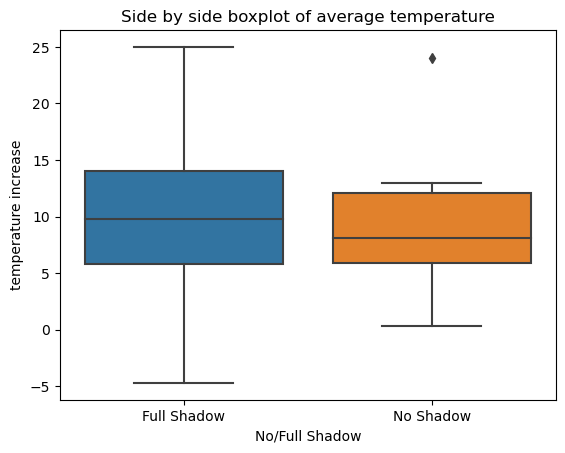

In [21]:
sns.boxplot(x = 'Phil', y = 'increase(Midwest)', data = df_gh2)
plt.xlabel('No/Full Shadow')
plt.ylabel('temperature increase')
plt.title('Side by side boxplot of average temperature')

**e)** Finally, we'll consider what all of this information means.  If you don't like the idea of winter being extended, would you want Phil to see his shadow on Groundhog Day?  Explain.

Thinking critically about our data, do you have any questions about the data?  Do you notice any limitations to results that you can draw from this data?

The median temperature increase if seeing shadow is slightly higher than if you didn't see shadow. It seems that if Phil see the shadow, it is likely that temperature will decrease in a month. But if phil didn't see the shadow, temperature seems will not decrease(increase > 0). Therefore, I would rather preper seeing no shadow. At least, temperature may not decrease again.
One of the question is that full shadow have both higher upper bound and lower bound. It is hard to judge whether the temperature will increase or decrease if you see a full shadow.

<hr>

## <u>Case Study</u>: Poker Hand

In poker, a player is dealt 5 cards from a standard deck of 52 cards.  One type of hand that can be dealt is a three of a kind, where a player has three cards of the same rank (face), one card of a different rank, and the last card of a different rank from the other two.  Note that this is distinct from a full house, where we have three of a kind (three cards of the same rank) and a pair (two cards of the same rank).  

## 4. Actual Probability [6 points]

First, using our counting rules, calculate the actual probability if drawing a three of a kind poker hand.

**Show your work and calculations.**

In [22]:
4*48*44*13/2

54912.0

In [23]:
(52*51*50*49*48)/(1*2*3*4*5)

2598960.0

In [24]:
54912/2598960

0.02112845138055222

0.02112845138055222

## 5. Probability Estimate [14 points]

We have created two test hands below in the form of data frames.  

1. **hand1** is a 'three of a kind' hand
2. **hand2** is not a 'three of a kind' hand

In [25]:
import pandas as pd
hand1 = pd.DataFrame({'face': ['J','J','2','9','J'],
                           'suit': ['heart', 'club', 'spade', 'club', 'diamond']})
hand1

,face,suit
0,J,heart
1,J,club
2,2,spade
3,9,club
4,J,diamond


In [26]:
hand2 = pd.DataFrame({'face': ['J','J','Q','Q','J'],
                           'suit': ['heart', 'club', 'spade', 'club', 'diamond']})
hand2

,face,suit
0,J,heart
1,J,club
2,Q,spade
3,Q,club
4,J,diamond


**a)** Create a function that returns True if a hand is a three of a kind and False if a hand is not three of a kind.

In [27]:
df_poke = pd.read_csv('cards.csv')
df_poke.face.unique()

array(['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K'],
      dtype=object)

In [28]:
hand1.face.values

array(['J', 'J', '2', '9', 'J'], dtype=object)

In [29]:
def judgeHand(df):
    value = df.face.unique()
    if (len(value) != 3) | (len(df) != 5):
        return False
    for m in df.face.values:
        count = 0
        for n in df.face.values:
             if m == n: count += 1
        if count == 3:
            return True

**b)** Confirm this function works using **hand1** and **hand2**.

In [30]:
print(judgeHand(hand1))
print(judgeHand(hand2))

True
False


hand 1 is true. hand 2 is false.

**c)** Using the cards.csv file, conduct one trial that does the following:

1. Draws a poker hand.
2. Checks if the hand is three of a kind.

In [31]:
df_poke = pd.read_csv('cards.csv')
df_draw = df_poke.sample(5, replace = False)
judgeHand(df_draw)

False

**d)** Now, extend your work from part c to repeat this 20,000 times.

Specifically, for this simulation:

1. Simulate drawing 20,000 different hands of poker.  Each hand is randomly sampled without replacement.  You can assume after each trial the previous cards are returned to the deck, so that you have a fresh 52 card deck at the start of each trial.
2. Test whether the hand drawn is a three of a kind.
3. Calculate the proportion of trials that were a three of a kind.

**Warning: using print statements may cause your notebook to crash, depending on where the statements are located in your code.**

In [32]:
data = []
for i in range(20000):
    draw = df_poke.sample(5, replace = False)
    result = judgeHand(draw)
    d = {'result':result}
    data.append(d)
df_result = pd.DataFrame(data)
df_result

,result
0,False
1,True
2,False
3,False
4,False
...,...
19995,False
19996,False
19997,False
19998,None


In [33]:
len(df_result[df_result.result == True])/len(df_result)

0.0217

## 6. Comparing Probabilities [1 point]

What is the difference between your theoretical and estimated probabilities above?

In [35]:
prob_theo = 0.02112845138055222
prob_simu = 0.0217
prob_diff = abs(prob_theo - prob_simu)
print(f"The difference between theoretical probility and estimated probility is {prob_diff}.")

The difference between theoretical probility and estimated probility is 0.0005715486194477794.


Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 4 Canvas Assignment to submit your notebook to GitHub.